In [4]:
import os 
import numpy as np
import pandas as pd
import anndata
import scanpy as sc
import matplotlib.pyplot as plt
import scgen
import seaborn as sns
from scipy import stats
import sklearn as sk
import matplotlib
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)

In [5]:
path_to_save = "../results/Figures/Supplemental Figure 10/"
os.makedirs(path_to_save, exist_ok=True)
sc.settings.figdir = path_to_save

In [6]:
train = sc.read('../data/pancreas.h5ad')
train.obs["cell_type"] = train.obs["celltype"].tolist()
train

AnnData object with n_obs × n_vars = 14693 × 2448 
    obs: 'celltype', 'sample', 'n_genes', 'batch', 'n_counts', 'louvain', 'cell_type'
    var: 'n_cells-0', 'n_cells-1', 'n_cells-2', 'n_cells-3'
    uns: 'celltype_colors', 'louvain', 'neighbors', 'pca', 'sample_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [7]:
top_cell_types = train.obs["cell_type"].value_counts().index.tolist()[:7]
top_cell_types.remove("not applicable")
train.obs["cell_type"] = "others"
for cell_type in top_cell_types:
    train.obs.loc[train.obs["celltype"] == cell_type, "cell_type"] = cell_type
train.obs["cell_type"].unique()

array(['acinar', 'beta', 'delta', 'others', 'ductal', 'alpha', 'gamma'],
      dtype=object)

... storing 'cell_type' as categorical


saving figure to file ../results/Figures/Supplemental Figure 10/umap_batch.pdf


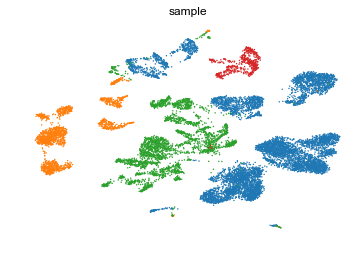

saving figure to file ../results/Figures/Supplemental Figure 10/umap_celltype.pdf


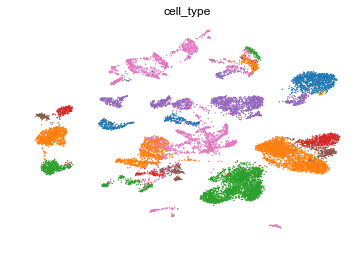

In [8]:
sc.pp.neighbors(train)
sc.tl.umap(train)
sc.pl.umap(train, color=["sample"], frameon=False, legend_loc=None, wspace=.5, show=True, save="_batch.pdf")
sc.pl.umap(train, color=["cell_type"], frameon=False, legend_loc=None, wspace=.5, show=True, save="_celltype.pdf")
os.rename(src=os.path.join(path_to_save, "umap_batch.pdf"), 
          dst=os.path.join(path_to_save, "SupplFig10a_umap_batch_original.pdf"))
os.rename(src=os.path.join(path_to_save, "umap_celltype.pdf"), 
          dst=os.path.join(path_to_save, "SupplFig10a_umap_celltype_original.pdf"))

In [9]:
sc.tl.pca(train, svd_solver='arpack')
X_pca = train.obsm["X_pca"] * -1
labels = train.obs["batch"].tolist()
print(f" average silhouette_score for original data : {sk.metrics.silhouette_score(X_pca, labels)}")

 average silhouette_score for original data : 0.21305911242961884


In [ ]:
%%bash
python3 ../code/pancreas.py

In [10]:
pancreas_batched = sc.read('../data/reconstructed/scGen/pancreas.h5ad')
pancreas_batched.obs["cell_type"] = train.obs["celltype"].tolist()
pancreas_batched

AnnData object with n_obs × n_vars = 14693 × 2448 
    obs: 'cell_type', 'study', 'celltype'

         Falling back to preprocessing with `sc.pp.pca` and default params.


... storing 'cell_type' as categorical


saving figure to file ../results/Figures/Supplemental Figure 10/umap_pancreas_cell_batched.pdf


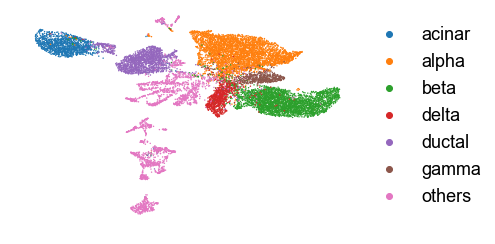

saving figure to file ../results/Figures/Supplemental Figure 10/umap_study_pancreas_batched.pdf


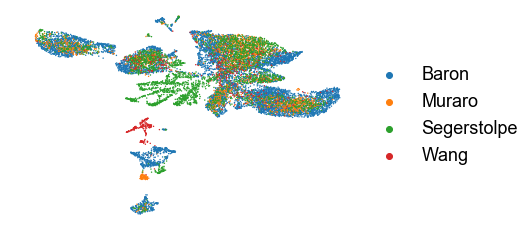

In [11]:
sc.pp.neighbors(pancreas_batched)
sc.tl.umap(pancreas_batched)
sc.pl.umap(pancreas_batched, title="", palette=matplotlib.rcParams["axes.prop_cycle"], color=["celltype"],
           save="_pancreas_cell_batched.pdf", frameon=False, show=True, legend_fontsize=18)
sc.pl.umap(pancreas_batched, title="", palette=matplotlib.rcParams["axes.prop_cycle"], color=["study"],
           save="_study_pancreas_batched.pdf", frameon=False, show=True, legend_fontsize=18)
os.rename(src=os.path.join(path_to_save, "umap_pancreas_cell_batched.pdf"),
          dst=os.path.join(path_to_save, "SupplFig10b_umap_scgen_celltype.pdf"))
os.rename(src=os.path.join(path_to_save, "umap_study_pancreas_batched.pdf"),
          dst=os.path.join(path_to_save, "SupplFig10b_umap_scgen_batch.pdf"))

In [12]:
bbknn = sc.read("../data/bbknn.h5ad")
top_cell_types = bbknn.obs["celltype"].value_counts().index.tolist()[:7]
top_cell_types.remove("not applicable")
bbknn.obs["cell_type"] = "others"
for cell_type in top_cell_types:
    bbknn.obs.loc[bbknn.obs["celltype"] == cell_type, "cell_type"] = cell_type
bbknn.obs["cell_type"].unique()

array(['acinar', 'beta', 'delta', 'others', 'ductal', 'alpha', 'gamma'],
      dtype=object)

In [13]:
sc.tl.umap(bbknn)

... storing 'cell_type' as categorical


saving figure to file ../results/Figures/Supplemental Figure 10/umap_bbknn_batch.pdf


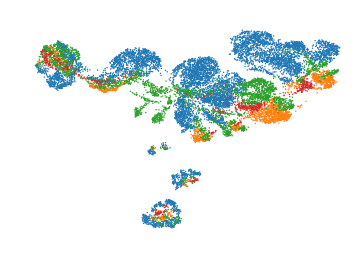

saving figure to file ../results/Figures/Supplemental Figure 10/umap_bbknn_celltype.pdf


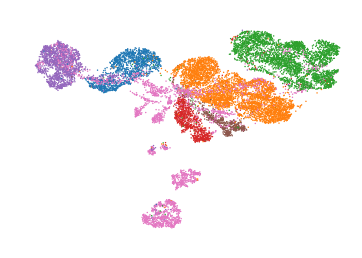

In [14]:
sc.pl.umap(bbknn, color="sample", palette=matplotlib.rcParams["axes.prop_cycle"], legend_loc='none', save="_bbknn_batch.pdf", frameon=False, title=" ")
sc.pl.umap(bbknn, color="cell_type", palette=matplotlib.rcParams["axes.prop_cycle"], legend_loc='none', save="_bbknn_celltype.pdf", frameon=False,  title=" ")

In [15]:
cca = sc.read("../data/cca.h5ad")
top_cell_types = cca.obs["celltype"].value_counts().index.tolist()[:7]
top_cell_types.remove("not applicable")
cca.obs["cell_type"] = "others"
for cell_type in top_cell_types:
    cca.obs.loc[cca.obs["celltype"] == cell_type, "cell_type"] = cell_type
cca.obs["cell_type"].unique()

array(['acinar', 'beta', 'delta', 'others', 'ductal', 'alpha', 'gamma'],
      dtype=object)

In [16]:
sc.pp.neighbors(cca)
sc.tl.umap(cca)

... storing 'cell_type' as categorical


saving figure to file ../results/Figures/Supplemental Figure 10/umap_cca_batch.pdf


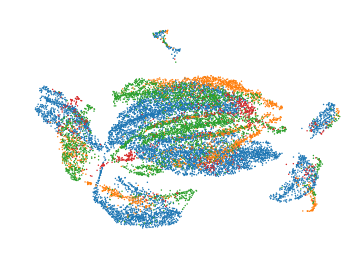

saving figure to file ../results/Figures/Supplemental Figure 10/umap_cca_celltype.pdf


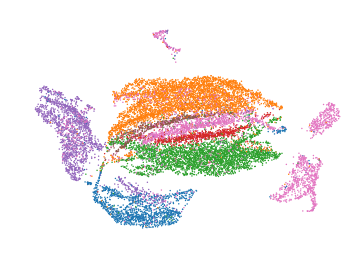

In [17]:
sc.pl.umap(cca, color="sample", palette=matplotlib.rcParams["axes.prop_cycle"], legend_loc=False,  save="_cca_batch.pdf", frameon=False, title=" ")
sc.pl.umap(cca, color="cell_type", palette=matplotlib.rcParams["axes.prop_cycle"], legend_loc=False, save="_cca_celltype.pdf", frameon=False,  title=" ")

In [18]:
X = cca.obsm["X_pca"]
labels = cca.obs["batch"].tolist()
print(f"average silhouette_score for cca : {sk.metrics.silhouette_score(X,labels)}")

average silhouette_score for cca : -0.0009046235353765612


In [19]:
MNN = sc.read("../data/mnn.h5ad")
top_cell_types = MNN.obs["celltype"].value_counts().index.tolist()[:7]
top_cell_types.remove("not applicable")
MNN.obs["cell_type"] = "others"
for cell_type in top_cell_types:
    MNN.obs.loc[MNN.obs["celltype"] == cell_type, "cell_type"] = cell_type
MNN.obs["cell_type"].unique()

array(['acinar', 'beta', 'delta', 'others', 'ductal', 'alpha', 'gamma'],
      dtype=object)

In [20]:
sc.tl.pca(MNN, svd_solver='arpack')
MNN.obsm['X_pca'] *= -1  # multiply by -1 to match Seurat
sc.pp.neighbors(MNN)
sc.tl.umap(MNN)

... storing 'cell_type' as categorical


saving figure to file ../results/Figures/Supplemental Figure 10/umap_mnn_batch.pdf


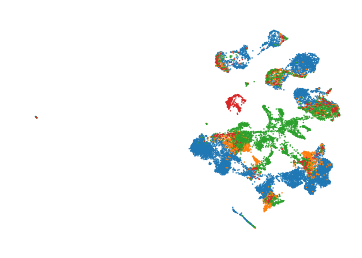

saving figure to file ../results/Figures/Supplemental Figure 10/umap_mnn_celltype.pdf


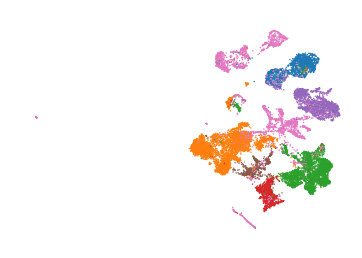

In [21]:
sc.pl.umap(MNN, color="batch", palette=matplotlib.rcParams["axes.prop_cycle"], legend_loc='none', save="_mnn_batch.pdf", frameon=False, title=" ")
sc.pl.umap(MNN, color="cell_type", legend_loc='none', save="_mnn_celltype.pdf", frameon=False,  title=" ")

In [22]:
sc.tl.pca(MNN, svd_solver='arpack')
MNN.obsm['X_pca'] *= -1  # multiply by -1 to match Seurat
X = MNN.obsm["X_pca"]
labels = MNN.obs["batch"].tolist()
print(f"average silhouette_score for MNN : {sk.metrics.silhouette_score(X,labels)}")

average silhouette_score for MNN : 0.008741149678826332


In [23]:
scanorama = sc.read("../data/scanorama.h5ad")
top_cell_types = scanorama.obs["celltype"].value_counts().index.tolist()[:7]
top_cell_types.remove("not applicable")
scanorama.obs["cell_type"] = "others"
for cell_type in top_cell_types:
    scanorama.obs.loc[scanorama.obs["celltype"] == cell_type, "cell_type"] = cell_type
scanorama.obs["cell_type"].unique()

array(['acinar', 'beta', 'delta', 'others', 'ductal', 'alpha', 'gamma'],
      dtype=object)

In [24]:
sc.tl.pca(scanorama, svd_solver='arpack')
scanorama.obsm['X_pca'] *= -1  # multiply by -1 to match Seurat
sc.pp.neighbors(scanorama)
sc.tl.umap(scanorama)

... storing 'cell_type' as categorical


saving figure to file ../results/Figures/Supplemental Figure 10/umap_scanorama_batch.pdf


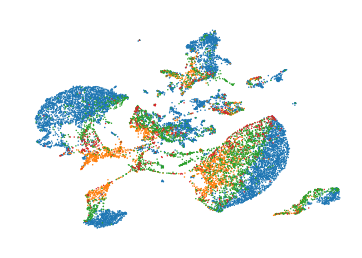

saving figure to file ../results/Figures/Supplemental Figure 10/umap_scanorama_celltype.pdf


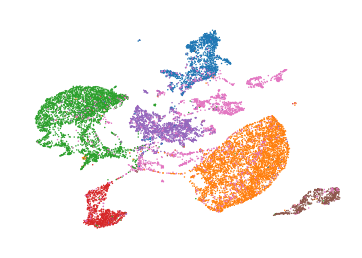

In [25]:
sc.pl.umap(scanorama, color="sample", palette=matplotlib.rcParams["axes.prop_cycle"], legend_loc='none', save="_scanorama_batch.pdf", frameon=False, title=" ")
sc.pl.umap(scanorama, color="cell_type", palette=matplotlib.rcParams["axes.prop_cycle"], legend_loc='none', save="_scanorama_celltype.pdf", frameon=False,  title=" ")

In [26]:
sc.tl.pca(scanorama, svd_solver='arpack')
scanorama.obsm['X_pca'] *= -1  # multiply by -1 to match Seurat
X = scanorama.obsm["X_pca"]
labels = scanorama.obs["batch"].tolist()
print(f"average silhouette_score for scanorama : {sk.metrics.silhouette_score(X,labels)}")

average silhouette_score for scanorama : -0.007466003764420748
